In [1]:
from sklearn.datasets import make_classification

In [2]:
SAMPLES, CLASSES = make_classification(n_samples=1000, n_classes=2, n_features=5, n_redundant=0, random_state=1)

In [3]:
SAMPLES.shape

(1000, 5)

In [4]:
CLASSES.shape

(1000,)

In [5]:
SAMPLES

array([[-0.21080113, -1.27187358, -0.25431072, -0.35363543,  1.20205935],
       [ 0.06376211, -0.2168127 , -0.83114819, -0.84028713,  0.33329307],
       [ 1.63253135, -1.37665157, -0.76218483, -2.28883786,  1.07072559],
       ...,
       [ 1.47436041,  0.1445099 , -1.37042989, -0.7607248 ,  0.15550037],
       [-0.54948664, -0.16866229,  0.0075604 , -1.83910137,  0.29473951],
       [-1.27403318,  0.00726048, -0.45492784,  0.85541965,  1.9865392 ]])

In [6]:
CLASSES

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,

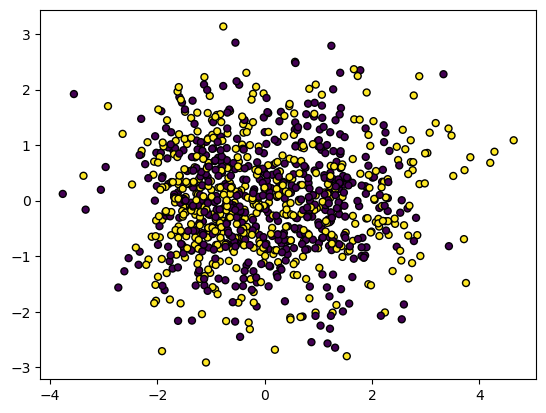

In [7]:
import matplotlib.pyplot as plt

plt.scatter(SAMPLES[:,0], SAMPLES[:,1], marker="o", s=25, edgecolor="k", c=CLASSES)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(SAMPLES, CLASSES, test_size=0.2)

In [10]:
X_train.shape, Y_train.shape

((800, 5), (800,))

In [11]:
X_test.shape, Y_test.shape

((200, 5), (200,))

In [13]:
import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

In [14]:
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]

In [16]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    scores.append(score)

C:\Users\yanni\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [17]:
scores

[0.84,
 0.85,
 0.805,
 0.835,
 0.865,
 0.87,
 0.83,
 0.825,
 0.83,
 0.845,
 0.855,
 0.865,
 0.86,
 0.845]

In [18]:
import pandas as pd

In [19]:
df = pd.DataFrame(index=names)
df['score'] = scores

In [20]:
df

,score
Nearest_Neighbors,0.840
Linear_SVM,0.850
Polynomial_SVM,0.805
RBF_SVM,0.835
Gaussian_Process,0.865
Gradient_Boosting,0.870
Decision_Tree,0.830
Extra_Trees,0.825
Random_Forest,0.830
Neural_Net,0.845


In [21]:
df.style.background_gradient(cmap='viridis').set_precision(4)

C:\Users\yanni\AppData\Local\Temp\ipykernel_8772\1522526718.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.style.background_gradient(cmap='viridis').set_precision(4)


,score
Nearest_Neighbors,0.8400
Linear_SVM,0.8500
Polynomial_SVM,0.8050
RBF_SVM,0.8350
Gaussian_Process,0.8650
Gradient_Boosting,0.8700
Decision_Tree,0.8300
Extra_Trees,0.8250
Random_Forest,0.8300
Neural_Net,0.8450


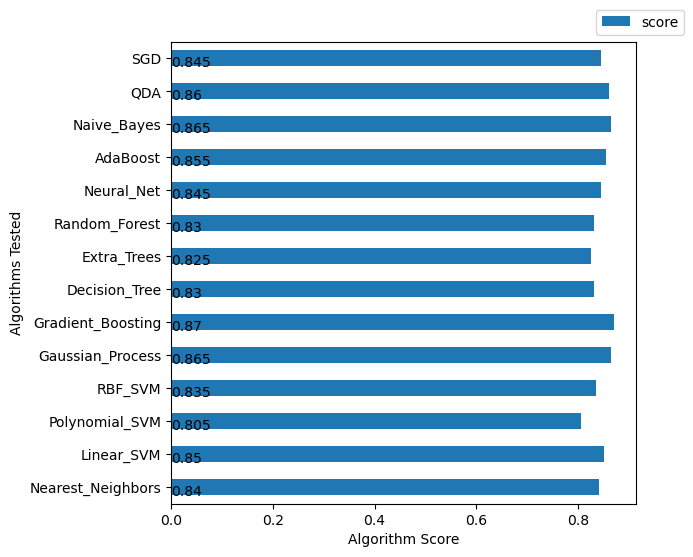

In [24]:
ax = df.plot.barh(figsize=(6,6))
ax.legend(bbox_to_anchor=(0.9, 1.0))

ax.set_xlabel("Algorithm Score")
ax.set_ylabel("Algorithms Tested")

for p in ax.patches:
    ax.annotate(str(round(p.get_width(),4)),(0, p.get_y(),))